<a href="https://colab.research.google.com/github/adalbertii/phyton-binder/blob/main/wmi_pytorch_regression_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Educational Friday: 21.04.2023**


---
Developed by Wojciech Michalski


---




# Building neural network  - regresion model case




With use: PyTorch library



Pobranie danych uczących i danych walidujących

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data.feature_names)
X, y = data.data, data.target

Bodowa modelu sieci neuronowej

In [ ]:
import torch.nn as nn
# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

Definicja funkcji błędu uczenia oraz algorytmu optymalizacji sieci

In [ ]:
import torch.nn as nn
import torch.optim as optim 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

Proces uczenia sieci

In [ ]:
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split
 
# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
 
# training parameters
n_epochs = 20   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)

<All keys matched successfully>

Charakterystyka wytrenowanego modelu sieci

In [ ]:
import matplotlib.pyplot as plt
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

Model sieci neuronowej z ustandaryzowanymi danymi wejściowymi 
Kompletny kod programu

MSE: 0.34
RMSE: 0.58


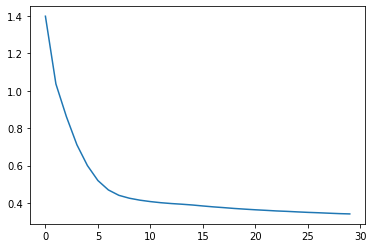

[ 4.23910000e+00  5.00000000e+00  5.12380952e+00  9.33333333e-01
  8.73300000e+03  8.31714286e+01  3.44700000e+01 -1.18590000e+02] -> [2.880638] (expected [1.546])
[ 6.43190000e+00  3.40000000e+01  6.51404494e+00  9.38202247e-01
  9.41000000e+02  2.64325843e+00  3.39500000e+01 -1.18110000e+02] -> [3.4352903] (expected [4.523])
[   3.0694       44.            5.38585209    1.0192926   806.
    2.59163987   37.95       -122.34      ] -> [1.7593583] (expected [1.353])
[ 2.16410000e+00  3.10000000e+01  3.80904523e+00  1.00502513e+00
  1.82000000e+03  4.57286432e+00  3.39300000e+01 -1.18180000e+02] -> [1.326714] (expected [1.229])
[ 2.54300000e+00  1.50000000e+01  4.87709497e+00  1.11545624e+00
  1.51300000e+03  2.81750466e+00  3.28100000e+01 -1.16950000e+02] -> [1.4771143] (expected [1.])


In [ ]:
import copy
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
 
# Read data
data = fetch_california_housing()
X, y = data.data, data.target
 
# train-test split for model evaluation
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 
# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
 
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
 
# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)
 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)
 
n_epochs = 30   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()
 
model.eval()
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(5):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        print(f"{X_test_raw[i]} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")


In [ ]:
model.eval()
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(50):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        print(f"{y_pred[0].numpy()} (expected {y_test[i].numpy()})")

[2.880638] (expected [1.546])
[3.4352903] (expected [4.523])
[1.7593583] (expected [1.353])
[1.326714] (expected [1.229])
[1.4771143] (expected [1.])
[1.9272652] (expected [0.283])
[3.3198137] (expected [3.714])
[3.2100155] (expected [2.469])
[1.3627675] (expected [1.648])
[1.2806917] (expected [1.431])
[3.3593497] (expected [3.375])
[1.4109303] (expected [0.875])
[1.3414384] (expected [0.983])
[3.2121227] (expected [3.447])
[0.5160064] (expected [0.858])
[1.0021582] (expected [0.771])
[2.2006648] (expected [2.006])
[2.0573711] (expected [2.374])
[2.1425865] (expected [1.367])
[2.4825768] (expected [2.337])
[2.770143] (expected [2.05])
[2.179395] (expected [2.578])
[1.0771416] (expected [0.845])
[4.8801436] (expected [5.00001])
[1.2840844] (expected [0.886])
[1.6709043] (expected [2.375])
[2.1480105] (expected [2.07])
[0.54968244] (expected [0.592])
[2.7021666] (expected [4.309])
[2.0235705] (expected [1.991])
[0.8266989] (expected [0.475])
[0.7597371] (expected [0.455])
[1.7532083] (e